In [1]:
import pandas as pd
import os
from transformers import AutoTokenizer
from transformers import AutoModelForCausalLM, AutoModelForMaskedLM, AutoModelForSeq2SeqLM, AutoModelForSequenceClassification
from tqdm.auto import tqdm
import evaluate
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.optim import AdamW
from transformers import get_scheduler
import json
from sklearn.model_selection import train_test_split

from TextDataset import TextDataset
from transformers import BertForSequenceClassification, BertConfig, BertTokenizer

from matplotlib import pyplot as plt

In [2]:
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
print(device)

mps


In [1]:
from run_bert import run
for i in range(1, 11):
    run(i, 50)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


mps


/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(800, 3) (86, 5)
num_epochs 50


  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 140.4180, Accuracy: 0.56, Learning Rate: 0.00000100
Epoch 2/50, Loss: 129.0576, Accuracy: 0.70, Learning Rate: 0.00000200
Epoch 3/50, Loss: 103.3430, Accuracy: 0.72, Learning Rate: 0.00000300
Epoch 4/50, Loss: 92.9094, Accuracy: 0.77, Learning Rate: 0.00000400
Epoch 5/50, Loss: 73.2468, Accuracy: 0.76, Learning Rate: 0.00000500
Epoch 6/50, Loss: 61.1320, Accuracy: 0.74, Learning Rate: 0.00000489
Epoch 7/50, Loss: 42.4121, Accuracy: 0.77, Learning Rate: 0.00000478
Epoch 8/50, Loss: 31.1416, Accuracy: 0.76, Learning Rate: 0.00000467
Epoch 9/50, Loss: 24.6619, Accuracy: 0.74, Learning Rate: 0.00000456
Epoch 10/50, Loss: 15.6909, Accuracy: 0.76, Learning Rate: 0.00000444
Epoch 11/50, Loss: 10.0567, Accuracy: 0.78, Learning Rate: 0.00000433
Epoch 12/50, Loss: 8.3988, Accuracy: 0.77, Learning Rate: 0.00000422
Epoch 13/50, Loss: 5.3452, Accuracy: 0.80, Learning Rate: 0.00000411
Epoch 14/50, Loss: 4.2722, Accuracy: 0.81, Learning Rate: 0.00000400
Epoch 15/50, Loss: 0.1609, Ac

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(1200, 3) (86, 5)
num_epochs 50


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 206.9853, Accuracy: 0.63, Learning Rate: 0.00000100
Epoch 2/50, Loss: 190.8162, Accuracy: 0.74, Learning Rate: 0.00000200
Epoch 3/50, Loss: 150.6551, Accuracy: 0.77, Learning Rate: 0.00000300
Epoch 4/50, Loss: 131.0740, Accuracy: 0.81, Learning Rate: 0.00000400
Epoch 5/50, Loss: 115.3223, Accuracy: 0.76, Learning Rate: 0.00000500
Epoch 6/50, Loss: 87.1561, Accuracy: 0.79, Learning Rate: 0.00000489
Epoch 7/50, Loss: 67.2675, Accuracy: 0.77, Learning Rate: 0.00000478
Epoch 8/50, Loss: 31.8927, Accuracy: 0.81, Learning Rate: 0.00000467
Epoch 9/50, Loss: 22.6614, Accuracy: 0.79, Learning Rate: 0.00000456
Epoch 10/50, Loss: 15.1012, Accuracy: 0.83, Learning Rate: 0.00000444
Epoch 11/50, Loss: 9.3496, Accuracy: 0.83, Learning Rate: 0.00000433
Epoch 12/50, Loss: 10.4503, Accuracy: 0.83, Learning Rate: 0.00000422
No improvement. Patience counter: 1/5
Epoch 13/50, Loss: 4.4448, Accuracy: 0.80, Learning Rate: 0.00000411
Epoch 14/50, Loss: 3.7298, Accuracy: 0.78, Learning Rate: 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(1600, 3) (86, 5)
num_epochs 50


  0%|          | 0/20000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 277.1521, Accuracy: 0.71, Learning Rate: 0.00000100
Epoch 2/50, Loss: 242.9750, Accuracy: 0.69, Learning Rate: 0.00000200
Epoch 3/50, Loss: 178.1995, Accuracy: 0.74, Learning Rate: 0.00000300
Epoch 4/50, Loss: 133.0205, Accuracy: 0.78, Learning Rate: 0.00000400
Epoch 5/50, Loss: 83.3438, Accuracy: 0.81, Learning Rate: 0.00000500
Epoch 6/50, Loss: 46.0899, Accuracy: 0.78, Learning Rate: 0.00000489
Epoch 7/50, Loss: 21.3974, Accuracy: 0.79, Learning Rate: 0.00000478
Epoch 8/50, Loss: 5.4834, Accuracy: 0.80, Learning Rate: 0.00000467
Epoch 9/50, Loss: 1.9716, Accuracy: 0.79, Learning Rate: 0.00000456
Epoch 10/50, Loss: 3.8953, Accuracy: 0.78, Learning Rate: 0.00000444
No improvement. Patience counter: 1/5
Epoch 11/50, Loss: 0.0378, Accuracy: 0.79, Learning Rate: 0.00000433
Epoch 12/50, Loss: 8.9805, Accuracy: 0.81, Learning Rate: 0.00000422
No improvement. Patience counter: 1/5
Epoch 13/50, Loss: 3.5534, Accuracy: 0.80, Learning Rate: 0.00000411
No improvement. Patience 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(2000, 3) (86, 5)
num_epochs 50


  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 341.9149, Accuracy: 0.69, Learning Rate: 0.00000100
Epoch 2/50, Loss: 283.4325, Accuracy: 0.76, Learning Rate: 0.00000200
Epoch 3/50, Loss: 201.7199, Accuracy: 0.77, Learning Rate: 0.00000300
Epoch 4/50, Loss: 148.3268, Accuracy: 0.78, Learning Rate: 0.00000400
Epoch 5/50, Loss: 90.7507, Accuracy: 0.80, Learning Rate: 0.00000500
Epoch 6/50, Loss: 43.3521, Accuracy: 0.81, Learning Rate: 0.00000489
Epoch 7/50, Loss: 12.7130, Accuracy: 0.81, Learning Rate: 0.00000478
Epoch 8/50, Loss: 10.8235, Accuracy: 0.84, Learning Rate: 0.00000467
Epoch 9/50, Loss: 9.7582, Accuracy: 0.76, Learning Rate: 0.00000456
Epoch 10/50, Loss: 14.8208, Accuracy: 0.81, Learning Rate: 0.00000444
No improvement. Patience counter: 1/5
Epoch 11/50, Loss: 2.4198, Accuracy: 0.73, Learning Rate: 0.00000433
Epoch 12/50, Loss: 16.9884, Accuracy: 0.77, Learning Rate: 0.00000422
No improvement. Patience counter: 1/5
Epoch 13/50, Loss: 3.4877, Accuracy: 0.80, Learning Rate: 0.00000411
No improvement. Patien

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 16/50, Loss: 17.5620, Accuracy: 0.79, Learning Rate: 0.00000378
No improvement. Patience counter: 5/5
Early stopping triggered.
mps


/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(2400, 3) (86, 5)
num_epochs 50


  0%|          | 0/30000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 415.1383, Accuracy: 0.69, Learning Rate: 0.00000100
Epoch 2/50, Loss: 314.7491, Accuracy: 0.73, Learning Rate: 0.00000200
Epoch 3/50, Loss: 215.3113, Accuracy: 0.72, Learning Rate: 0.00000300
Epoch 4/50, Loss: 154.2976, Accuracy: 0.76, Learning Rate: 0.00000400
Epoch 5/50, Loss: 61.5541, Accuracy: 0.73, Learning Rate: 0.00000500
Epoch 6/50, Loss: 37.7574, Accuracy: 0.78, Learning Rate: 0.00000489
Epoch 7/50, Loss: 20.5580, Accuracy: 0.80, Learning Rate: 0.00000478
Epoch 8/50, Loss: 3.2556, Accuracy: 0.74, Learning Rate: 0.00000467
Epoch 9/50, Loss: 19.0255, Accuracy: 0.79, Learning Rate: 0.00000456
No improvement. Patience counter: 1/5
Epoch 10/50, Loss: 3.5600, Accuracy: 0.78, Learning Rate: 0.00000444
No improvement. Patience counter: 2/5
Epoch 11/50, Loss: 7.1690, Accuracy: 0.79, Learning Rate: 0.00000433
No improvement. Patience counter: 3/5
Epoch 12/50, Loss: 1.6962, Accuracy: 0.80, Learning Rate: 0.00000422
Epoch 13/50, Loss: 2.5640, Accuracy: 0.78, Learning Rat

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(2800, 3) (86, 5)
num_epochs 50


  0%|          | 0/35000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 476.0063, Accuracy: 0.66, Learning Rate: 0.00000100
Epoch 2/50, Loss: 374.4086, Accuracy: 0.73, Learning Rate: 0.00000200
Epoch 3/50, Loss: 282.7456, Accuracy: 0.78, Learning Rate: 0.00000300
Epoch 4/50, Loss: 201.7153, Accuracy: 0.77, Learning Rate: 0.00000400
Epoch 5/50, Loss: 84.7679, Accuracy: 0.78, Learning Rate: 0.00000500
Epoch 6/50, Loss: 36.1207, Accuracy: 0.76, Learning Rate: 0.00000489
Epoch 7/50, Loss: 37.8837, Accuracy: 0.73, Learning Rate: 0.00000478
No improvement. Patience counter: 1/5
Epoch 8/50, Loss: 13.4657, Accuracy: 0.78, Learning Rate: 0.00000467
Epoch 9/50, Loss: 11.2674, Accuracy: 0.79, Learning Rate: 0.00000456
Epoch 10/50, Loss: 19.4262, Accuracy: 0.76, Learning Rate: 0.00000444
No improvement. Patience counter: 1/5
Epoch 11/50, Loss: 15.2733, Accuracy: 0.73, Learning Rate: 0.00000433
No improvement. Patience counter: 2/5
Epoch 12/50, Loss: 12.2892, Accuracy: 0.67, Learning Rate: 0.00000422
No improvement. Patience counter: 3/5
Epoch 13/50, 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(3200, 3) (86, 5)
num_epochs 50


  0%|          | 0/40000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 539.2783, Accuracy: 0.79, Learning Rate: 0.00000100
Epoch 2/50, Loss: 383.5781, Accuracy: 0.77, Learning Rate: 0.00000200
Epoch 3/50, Loss: 246.4083, Accuracy: 0.77, Learning Rate: 0.00000300
Epoch 4/50, Loss: 133.8383, Accuracy: 0.73, Learning Rate: 0.00000400
Epoch 5/50, Loss: 64.3514, Accuracy: 0.78, Learning Rate: 0.00000500
Epoch 6/50, Loss: 32.1910, Accuracy: 0.76, Learning Rate: 0.00000489
Epoch 7/50, Loss: 17.9336, Accuracy: 0.73, Learning Rate: 0.00000478
Epoch 8/50, Loss: 13.1971, Accuracy: 0.77, Learning Rate: 0.00000467
Epoch 9/50, Loss: 16.7148, Accuracy: 0.77, Learning Rate: 0.00000456
No improvement. Patience counter: 1/5
Epoch 10/50, Loss: 23.9973, Accuracy: 0.76, Learning Rate: 0.00000444
No improvement. Patience counter: 2/5
Epoch 11/50, Loss: 0.9799, Accuracy: 0.78, Learning Rate: 0.00000433
Epoch 12/50, Loss: 17.5757, Accuracy: 0.78, Learning Rate: 0.00000422
No improvement. Patience counter: 1/5
Epoch 13/50, Loss: 12.7256, Accuracy: 0.70, Learning

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(3600, 3) (86, 5)
num_epochs 50


  0%|          | 0/45000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 594.5876, Accuracy: 0.73, Learning Rate: 0.00000100
Epoch 2/50, Loss: 409.7688, Accuracy: 0.70, Learning Rate: 0.00000200
Epoch 3/50, Loss: 231.5440, Accuracy: 0.73, Learning Rate: 0.00000300
Epoch 4/50, Loss: 126.3211, Accuracy: 0.74, Learning Rate: 0.00000400
Epoch 5/50, Loss: 72.0467, Accuracy: 0.73, Learning Rate: 0.00000500
Epoch 6/50, Loss: 39.2175, Accuracy: 0.74, Learning Rate: 0.00000489
Epoch 7/50, Loss: 20.4795, Accuracy: 0.76, Learning Rate: 0.00000478
Epoch 8/50, Loss: 8.4884, Accuracy: 0.78, Learning Rate: 0.00000467
Epoch 9/50, Loss: 11.7885, Accuracy: 0.73, Learning Rate: 0.00000456
No improvement. Patience counter: 1/5
Epoch 10/50, Loss: 13.6621, Accuracy: 0.73, Learning Rate: 0.00000444
No improvement. Patience counter: 2/5
Epoch 11/50, Loss: 6.9855, Accuracy: 0.78, Learning Rate: 0.00000433
Epoch 12/50, Loss: 13.1085, Accuracy: 0.79, Learning Rate: 0.00000422
No improvement. Patience counter: 1/5
Epoch 13/50, Loss: 26.7054, Accuracy: 0.76, Learning 

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(4000, 3) (86, 5)
num_epochs 50


  0%|          | 0/50000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 647.9188, Accuracy: 0.76, Learning Rate: 0.00000100
Epoch 2/50, Loss: 446.0151, Accuracy: 0.77, Learning Rate: 0.00000200
Epoch 3/50, Loss: 295.4347, Accuracy: 0.77, Learning Rate: 0.00000300
Epoch 4/50, Loss: 146.9892, Accuracy: 0.76, Learning Rate: 0.00000400
Epoch 5/50, Loss: 54.9712, Accuracy: 0.79, Learning Rate: 0.00000500
Epoch 6/50, Loss: 46.4594, Accuracy: 0.79, Learning Rate: 0.00000489
Epoch 7/50, Loss: 14.2024, Accuracy: 0.78, Learning Rate: 0.00000478
Epoch 8/50, Loss: 18.6727, Accuracy: 0.83, Learning Rate: 0.00000467
No improvement. Patience counter: 1/5
Epoch 9/50, Loss: 24.4601, Accuracy: 0.79, Learning Rate: 0.00000456
No improvement. Patience counter: 2/5
Epoch 10/50, Loss: 7.4255, Accuracy: 0.79, Learning Rate: 0.00000444
Epoch 11/50, Loss: 10.9906, Accuracy: 0.73, Learning Rate: 0.00000433
No improvement. Patience counter: 1/5
Epoch 12/50, Loss: 12.0920, Accuracy: 0.74, Learning Rate: 0.00000422
No improvement. Patience counter: 2/5
Epoch 13/50, L

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


(4400, 3) (86, 5)
num_epochs 50


  0%|          | 0/55000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 695.9362, Accuracy: 0.76, Learning Rate: 0.00000100
Epoch 2/50, Loss: 468.9928, Accuracy: 0.76, Learning Rate: 0.00000200
Epoch 3/50, Loss: 293.2599, Accuracy: 0.76, Learning Rate: 0.00000300
Epoch 4/50, Loss: 109.4990, Accuracy: 0.73, Learning Rate: 0.00000400
Epoch 5/50, Loss: 61.7373, Accuracy: 0.74, Learning Rate: 0.00000500
Epoch 6/50, Loss: 35.4021, Accuracy: 0.80, Learning Rate: 0.00000489
Epoch 7/50, Loss: 33.9111, Accuracy: 0.80, Learning Rate: 0.00000478
Epoch 8/50, Loss: 23.1958, Accuracy: 0.78, Learning Rate: 0.00000467
Epoch 9/50, Loss: 28.3301, Accuracy: 0.77, Learning Rate: 0.00000456
No improvement. Patience counter: 1/5
Epoch 10/50, Loss: 25.3678, Accuracy: 0.77, Learning Rate: 0.00000444
No improvement. Patience counter: 2/5
Epoch 11/50, Loss: 7.7299, Accuracy: 0.83, Learning Rate: 0.00000433
Epoch 12/50, Loss: 21.0097, Accuracy: 0.77, Learning Rate: 0.00000422
No improvement. Patience counter: 1/5
Epoch 13/50, Loss: 4.8573, Accuracy: 0.74, Learning 

## Config tokenizer and model

#### Call BertModel

In [3]:
# Create a config with the desired settings
config = BertConfig.from_pretrained('bert-base-uncased', num_labels=2)

# Load the model with the custom config
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

new_tokens = ['\n', '(.)', '(..)', '(...)', 'xxx']
tokenizer.add_tokens(new_tokens)
model.resize_token_embeddings(len(tokenizer))

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/Users/alan/anaconda3/envs/capstone/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Embedding(30527, 768, padding_idx=0)

#### Call AutoModel

## Load Data

In [17]:
train_complete = pd.read_csv("../data/train_complete_v3_4400.csv")
# train = train_complete[train_complete["example_index"].apply(lambda x: len(str(x)) <= 4)]
train = train_complete[train_complete["original_index"].apply(lambda x: pd.isna(x))]
# synthetic = train_complete[train_complete["original_index"].apply(lambda x: pd.notna(x))]
# train = pd.concat((true, synthetic.groupby('original_index').head(5)))
lines_train = train["line"].to_list()
labels_train = train["label"].to_list()

test = pd.read_csv("../data/test_complete_v1_86.csv")
lines_test = test["line"].to_list()
labels_test = test["label"].to_list()

In [20]:
print(train.shape, test.shape)

(400, 4) (86, 5)


In [21]:
train_dataset = TextDataset(lines_train, labels_train, tokenizer)
test_dataset = TextDataset(lines_test, labels_test, tokenizer)


train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=4)
test_dataloader = DataLoader(test_dataset, batch_size=16)

## Set Up Model

In [22]:
def model_accuracy(model, dataloader, device):
    """Evaluates the model on the given dataloader and returns accuracy"""
    model.eval()  # Set the model to evaluation mode

    correct_predictions = 0
    total_predictions = 0
    all_predictions = []
    all_labels = []

    with torch.no_grad():  # Disable gradient computation
        for batch in dataloader:
            # Move batch to device
            batch = {k: v.to(device) for k, v in batch.items()}

            # Forward pass
            outputs = model(**batch)
            logits = outputs.logits

            # Get predictions
            predictions = torch.argmax(logits, dim=-1)
            labels = batch['labels']

            # Update correct predictions and totals
            correct_predictions += (predictions == labels).sum().item()
            total_predictions += labels.size(0)

            # Collect all predictions and labels for other metrics
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate accuracy
    accuracy = correct_predictions / total_predictions

    return accuracy

In [23]:
optimizer = AdamW(model.parameters(), lr=5e-6)
criterion = nn.CrossEntropyLoss()

# Learning rate scheduler with warm-up
# cap_training_steps = 5000
# num_epochs = cap_training_steps // len(train_dataloader)
num_epochs = 50
cap_training_steps = num_epochs * len(train_dataloader)
print("num_epochs", num_epochs)
# num_training_steps = num_epochs * len(train_dataloader)
num_warmup_steps = int(0.1 * cap_training_steps)  # 10% warm-up
lr_scheduler = get_scheduler(
    name="linear", optimizer=optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=cap_training_steps
)

# Early stopping parameters
patience = 5  # Number of epochs to wait for improvement
best_loss = float('inf')
patience_counter = 0

model.to(device)

num_epochs 50


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30527, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

## Train

In [24]:
progress_bar = tqdm(range(cap_training_steps))

for epoch in tqdm(range(num_epochs)):
    epoch_loss = 0
    model.train()
    for batch in train_dataloader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(**batch)
        loss = criterion(outputs.logits, batch['labels'])
        epoch_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        lr_scheduler.step()

        progress_bar.update(1)
        
    epoch_accuracy = model_accuracy(model, test_dataloader, device)
    current_lr = lr_scheduler.get_last_lr()[0]
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}, Learning Rate: {lr_scheduler.get_last_lr()[0]:.8f}")

    if epoch_loss < best_loss:
        best_loss = epoch_loss
        patience_counter = 0
        # Save the best model
        torch.save(model.state_dict(), "models.nosync/tmp.pt")
        best_epoch = epoch
        best_acc = epoch_accuracy
    else:
        patience_counter += 1
        print(f"No improvement. Patience counter: {patience_counter}/{patience}")

    if patience_counter >= patience and best_loss < 20:
        print("Early stopping triggered.")
        break
os.rename("models.nosync/tmp.pt", "models.nosync/true_{0}_{1}epoch_{2}acc_{3}loss.pt".format(train.shape[0], best_epoch, round(best_acc * 100), round(best_loss,2)))

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch 1/50, Loss: 70.7146, Accuracy: 0.51, Learning Rate: 0.00000100
Epoch 2/50, Loss: 65.7786, Accuracy: 0.73, Learning Rate: 0.00000200
Epoch 3/50, Loss: 59.6564, Accuracy: 0.73, Learning Rate: 0.00000300
Epoch 4/50, Loss: 54.4302, Accuracy: 0.69, Learning Rate: 0.00000400
Epoch 5/50, Loss: 48.6698, Accuracy: 0.77, Learning Rate: 0.00000500
Epoch 6/50, Loss: 40.6442, Accuracy: 0.76, Learning Rate: 0.00000489
Epoch 7/50, Loss: 39.7658, Accuracy: 0.74, Learning Rate: 0.00000478
Epoch 8/50, Loss: 35.8822, Accuracy: 0.80, Learning Rate: 0.00000467
Epoch 9/50, Loss: 24.7749, Accuracy: 0.77, Learning Rate: 0.00000456
Epoch 10/50, Loss: 22.9301, Accuracy: 0.76, Learning Rate: 0.00000444
Epoch 11/50, Loss: 17.3018, Accuracy: 0.78, Learning Rate: 0.00000433
Epoch 12/50, Loss: 12.8486, Accuracy: 0.77, Learning Rate: 0.00000422
Epoch 13/50, Loss: 8.5204, Accuracy: 0.78, Learning Rate: 0.00000411
Epoch 14/50, Loss: 7.9304, Accuracy: 0.78, Learning Rate: 0.00000400
Epoch 15/50, Loss: 5.8050, Accu

## Test

In [37]:
# model.load_state_dict(torch.load("models.nosync/true_data_49epoch_80acc.pt"))
model.load_state_dict(torch.load("models.nosync/v4_4400_33epoch_78acc_0.0loss.pt"))

<All keys matched successfully>

In [38]:
test = pd.read_csv("../data/test_complete_v1_149.csv")
lines_test = test["line"].to_list()
labels_test = test["label"].to_list()
test_dataset = TextDataset(lines_test, labels_test, tokenizer)
test_dataloader = DataLoader(test_dataset, batch_size=16)

Accuracy:	 0.7516778523489933
Precision:	 0.8157396441052185
Recall:		 0.7516778523489933
F1 Score:	 0.7630429841247054


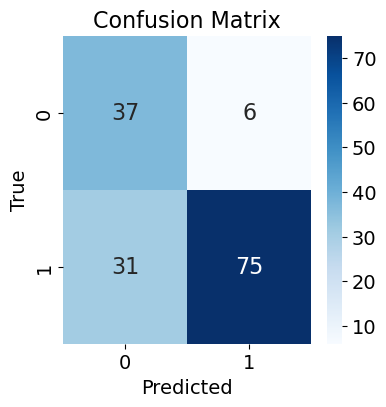

In [39]:
# Load the metrics you want to compute
accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

# Initialize lists to store all predictions and references
all_predictions = []
all_references = []

model.eval()  # Set the model to evaluation mode
for batch in test_dataloader:
    batch = {k: v.to(device) for k, v in batch.items()}
    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits
    predictions = torch.argmax(logits, dim=-1)

    # Move predictions and references to CPU and convert to numpy arrays
    predictions_cpu = predictions.cpu().numpy()
    references_cpu = batch["labels"].cpu().numpy()

    # Store predictions and references
    all_predictions.extend(predictions_cpu)
    all_references.extend(references_cpu)

# Compute all metrics at once using the full predictions
accuracy = accuracy_metric.compute(predictions=all_predictions, references=all_references)
precision = precision_metric.compute(predictions=all_predictions, references=all_references, average='weighted')
recall = recall_metric.compute(predictions=all_predictions, references=all_references, average='weighted')
f1 = f1_metric.compute(predictions=all_predictions, references=all_references, average='weighted')
print("Accuracy:\t", accuracy['accuracy'])
print("Precision:\t", precision['precision'])
print("Recall:\t\t", recall['recall'])
print("F1 Score:\t", f1['f1'])

# Compute and print confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_references, all_predictions)
plt.figure(figsize=(4,4))
plt.rcParams.update({'font.size': 14})
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('True', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()
